# Problem Set 6: Neural Networks


<span style="color:red">Warning!</span> Some of the problems in this problem set require heavy computation - you are encouraged to start early so that you don't get stuck at the last minute.

<span style="color:red">Note:</span> Lab 9 is your friend -- many of the examples will help you answers in this problem set. 

# Truck v/s Cars: Neural Networks and Image Classification

Your goal for this problem set is to train neural network models for image classification. Specifically, your task is to train models that correctly predict where the vehicle in a given image is a truck, or a car / automobile.

It might be useful to start by implementing this entire problem set on a relatively small subset of all of the images first, before using the full dataset.

From a coding perspective, it will be easiest to complete all the problems using pytorch; however, if you prefer to use keras / tensorflow or any other deeplearning API, feel free to do so. 

--- 
# Part 0

### Question 1 - upload your ipynb to bcourses

### Question 2 - upload your pdf to bcourses


### Question 3 - please provide a summary of any resources consulted, and people with whom you worked in the completion of the problem set.

Highlight any specific LLM prompts/resources used at the point of use.

# Part I. 

## Question 4: Load Data +  Exploratory Analysis

For this problem, we'll load the [CIFAR 10](https://en.wikipedia.org/wiki/CIFAR-10) dataset
. This dataset has been widely used in ML and computer vision research -- you can read more about the state of the art model performance (and how this has improved over time) [here](https://en.wikipedia.org/wiki/CIFAR-10).

The CIFAR 10 dataset originally has 10 classes -- we've provided helper code below to load the data, and remove images belonging to unnecessary classes. We will use this dataset for a supervised binary classification problem.

Your tasks:
- Create a subset of the CIFAR 10 data, keeping only the car (automobile) and truck classes.  
- Select 9 random images from your training set. Plot these images in a 3 X 3 grid, along with the corresponding category / label
- Plot the distribution of labels in your training, validation and test sets. 


In [1]:
from torchvision import datasets, transforms
import torch.nn as nn
import numpy as np
def load_cifar10(data_path):
    """
    Helper code to clean the CIFAR 10 dataset, and remove the unnecessary classes. 
    """
    class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
    
    cifar10 = datasets.CIFAR10(
        data_path, train=True, download=True,
        transform=transforms.Compose([
            transforms.ToTensor(), 
            # transforms.Normalize((0.4915, 0.4823, 0.4468),
            #                      (0.2470, 0.2435, 0.2616))
        ]))

    cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        # transforms.Normalize((0.4915, 0.4823, 0.4468),
        #                      (0.2470, 0.2435, 0.2616))
    ]))

    return cifar10, cifar10_val

In [2]:
## Load CIFAR data
datapath = '../data-unversioned/p1ch6/'
cifar10, cifar10_val = load_cifar10(datapath)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
### YOUR CODE HERE

In [3]:
label_map = {1: 0, 9: 1}
class_names = ['car', 'truck']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in list(label_map.keys())]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in list(label_map.keys())]

In [63]:
### YOUR CODE HERE

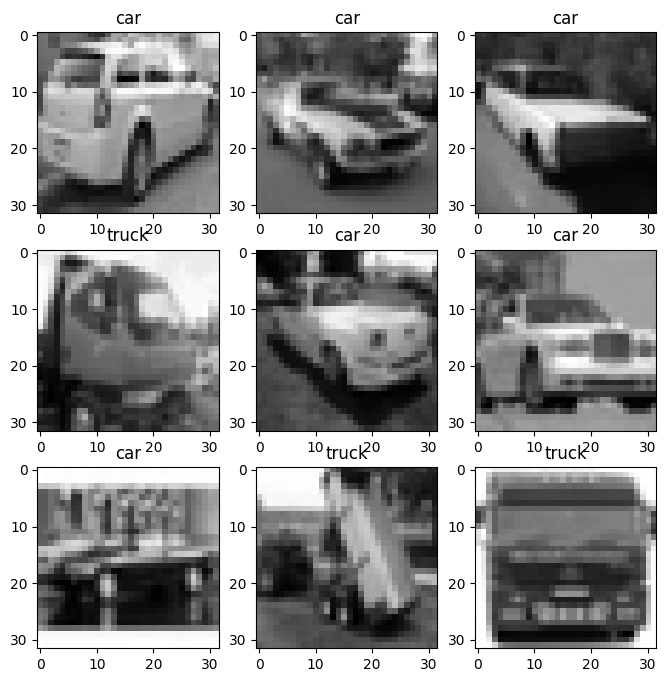

In [4]:
import matplotlib.pyplot as plt

img_idxs = [np.random.randint(len(cifar2)) for _ in range(9)]

fig, ax = plt.subplots(figsize = (8, 8), nrows = 3, ncols = 3)

for i in range(9):
    img, label = cifar2[img_idxs[i]]
    ax[i//3, i%3].imshow(img.mean(0), cmap = 'grey')
    ax[i//3, i%3].set_title(class_names[label])
plt.show()

In [5]:
train_labels = [l for _, l in cifar2]
val_labels = [l for _, l in cifar2_val]

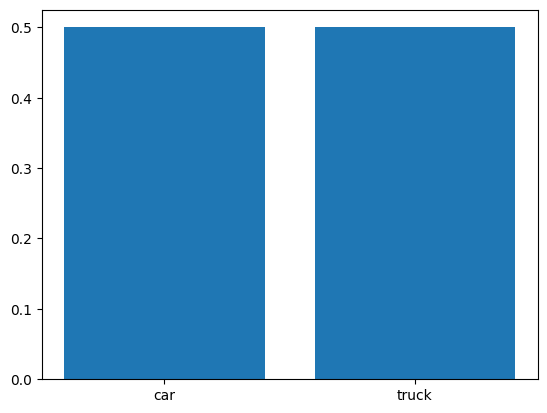

In [6]:
plt.bar(height = np.unique(train_labels, return_counts = True)[1] / len(train_labels), x = [0, 1])
plt.xticks([0, 1], ['car', 'truck'])
plt.show()

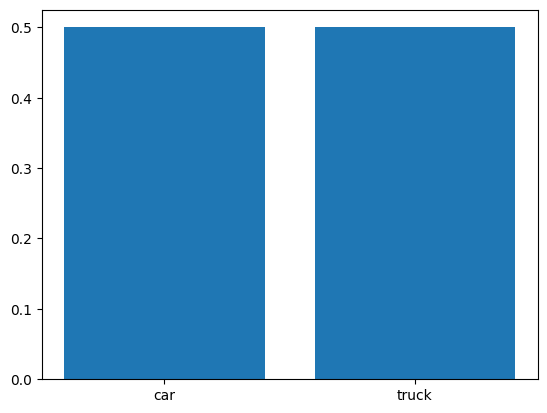

In [7]:
plt.bar(height = np.unique(val_labels, return_counts = True)[1] / len(val_labels), x = [0, 1])
plt.xticks([0, 1], ['car', 'truck'])
plt.show()

# Question 5: Convolutional Filters

Let's build some intuition for what convolutions actually do. First, complete the following steps. Then, answer the questions below. 

1. initizialize a convolutional layer (using nn.Conv2d):
    - in_channels: 3
    - out_channels: 1
    - kernel_size: 3
    - padding: 1

2. assign the following weights to the convolutional layer

\begin{align*}
\begin{bmatrix}
    -1.0 & -1.0 & -1.0\\
    0.0 & 0.0 & 0.0 \\
    1.0 & 1.0 & 1.0\\
\end{bmatrix}
\end{align*}

3. Pass the first image from the training dataset through this convolutional layer

4. Plot the raw image, and the resulting output

Then, answer the following questions

1. What do you notice about the output image? After applying the convolutional filter, what kind of features are more prominent / enhanced? Why is this the case (or in other words, what does step 2 help us achieve?)?
2. Here, we are explicitly assigning weights to this convolutional filter. This is never really done in practice; the goal is for the network estimate different filters from data in whatever way the discrimination is most effective. However, this does bring up some questions about different kinds of weight initializations and their consequences:
    - suppose we initialize convolutional layers with all the weights to zero. what would be the consequence?
    - instead, suppose we initialize the weights with random numbers (as is commonly done) -- what are some of the drawbacks of this approach?
    
Hint 1: Review the documentation for [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)\
Hint 2: Use conv.weight[:] to set the weights, where "conv" is the name of your convolutional layer.

In [8]:
import torch

In [9]:
#1. 
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

#2. 
with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, -1.0, -1.0],
                                    [0.0, 0.0, 0.0],
                                    [1.0, 1.0, 1.0]])
    conv.bias.zero_()

In [10]:
#3. 

test_img, _ = cifar2[0]
output = conv(test_img.unsqueeze(0))[0, 0].detach()

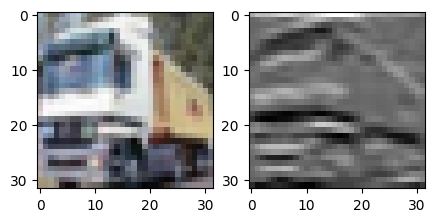

In [14]:
fig, ax = plt.subplots(figsize = (5, 5), ncols = 2)
ax[0].imshow(test_img.permute(1, 2, 0), cmap = 'grey')
ax[1].imshow(output, cmap = 'grey')
plt.show()

1. Horizontal edges are enhanced in the output image. The weights in step force the convolutional layer to behave like a horizontal edge detector. 
2. 0 weights -- symmetry / all nodes learn the same features / no real benefit to convolutions. 
    random weights -- depending on whether small / large -- vanishing / exploding gradients etc. 

# II. Neural Networks

# Question 6: Helper Functions

Complete the following functions:
- training: which invokes the training loop, similar to what we saw in Lab 9. 
- validate: given a trained model and data loader, generate performance metrics

Here is an example of how you will use these functions:

test_loader = ... (Define your data loader)

learning_rate = .. (define learning rate)\
neural_network = .. (initialize your neural network)\
optimizer = .. (set up your optimizer)\
loss_fn = .. (set up your loss function)

training( ....) 

validate(...)

In [17]:
def training(model, n_epochs, optimizer, fn_loss, data_loader):
    """
    Train a neural network model. (i.e this function invokes the training loop)
    ----------
    Parameters:
        
        model: torch model object
        n_epochs: number of epochs
        optimizer: torch.optim object
        fn_loss: torch loss function (torch.nn.modules.loss object)
        data_loader: torch data loader  
    ----------
    Returns:
        N/A
    """
    for epoch in range(1, n_epochs + 1):  
        train_loss = 0.0
        for imgs, labels in data_loader:  
            
            outputs = model(imgs)  
            
            loss = fn_loss(outputs, labels)
            
            optimizer.zero_grad() 
            loss.backward() 
            optimizer.step() 
            
            train_loss += loss.item()

        if epoch % 10 == 0:
            print(f'Epoch {epoch}. Train loss {train_loss / len(train_loader)}') 
    
def validate(model, data_loader):
    """
    Given a model and data loader, generate performance metrics. 
    -----------
    Parameters:
        model: (trained) neural network model
        data_loader: torch data loader
    """
    correct = 0
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    total = 0

    with torch.no_grad():  
        for imgs, labels in data_loader:
            outputs = model(imgs)
            _, predicted = torch.max(outputs, dim=1) 
            
            total += labels.shape[0]  
            correct += int((predicted == labels).sum())

            tp += int(((predicted == labels) & (labels == 1)).sum())
            fp += int(((predicted == 1) & (labels == 0)).sum())
            tn += int(((predicted == labels) & (labels == 0)).sum())
            fn += int(((predicted == 0) & (labels == 1)).sum())
                    
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2*precision*recall / (precision + recall)
    print(f"Accuracy: {correct / total:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")



# Question 7: Feedforward Neural Networks

Build a feedforward neural network with 2 hidden layers. You are expected to:

- Complete the FFN Class, based on the network architecture below (some scaffolding for this class is provided below, but feel free to write your own).
- Train / compile the network, following the guidelines below. 
- Report the accuracy, precision, recall and f1-score for the training and validation sets.
      

Network Architecture:
 - Input layer dimensions: 32 X 32 X 3 (W X H X C, where W = width, H = Height, C = Number of Channels)
 - Hidden layer 1: 256 nodes, relu activation

Compile:
- Optimizer: Adam
- Batch size: 32
- 
You may run the model for a maximum of 50 epochs. 

Note: Refer to lab 9 for an example of how to complete the FFN class

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [19]:
#### your code here

class FFN(nn.Module):
  def __init__(self):
    super(FFN, self).__init__()
    self.flatten = nn.Flatten()
    self.linear1 = nn.Linear(32*32*3, 256)
    self.activation1 = nn.ReLU()
    self.linear2 = nn.Linear(256, 2)
      
  def forward(self, x):
    out = self.flatten(x)
    out = self.activation1(self.linear1(out))
    out = self.linear2(out)
    return out

In [20]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=32,
                                           shuffle=True)

learning_rate = 0.01
ffn_model = FFN() 

optimizer = optim.Adam(ffn_model.parameters(), lr=learning_rate) 
loss_fn = nn.CrossEntropyLoss()  

training( 
    model = ffn_model,
    n_epochs = 50,
    optimizer = optimizer,
    
    fn_loss = loss_fn,
    data_loader = train_loader,
)

Epoch 10. Train loss 0.5648015768002397
Epoch 20. Train loss 0.5458847987004363
Epoch 30. Train loss 0.5377526113781305
Epoch 40. Train loss 0.5275969070177109
Epoch 50. Train loss 0.537967978289333


In [21]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=32,
                                           shuffle=False)

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=32,
                                         shuffle=False)

print("Training performance\n")
validate(ffn_model, train_loader)

print("\nValidation set performance\n")
validate(ffn_model, val_loader)

Training performance

Accuracy: 0.71
Precision: 0.87
Recall: 0.48
F1 Score: 0.62

Validation set performance

Accuracy: 0.67
Precision: 0.80
Recall: 0.46
F1 Score: 0.58


# Question 8: Convolutional Neural Networks

Build a convolutional neural network with two blocks, where each block is a convolutional layer followed by a max pooling layer. You are expected to:

- Complete the CNN Class, based on the network architecture below (some scaffolding for this class is provided below, but feel free to write your own).
- Train / compile the network, following the guidelines below. 
- Report the accuracy, precision, recall and f1-score for the training and validation sets.
      

Network Architecture:
 - Input layer dimensions: 32 X 32 X 3 (W X H X C, where W = width, H = Height, C = Number of Channels)
 - Convolutional layer1:
     - Number of filters / kernels: 20
     - Dimensions: 3 x 3
     - Activation: ReLU
 - Convolutional layer 2:
     - Number of filters / kernels: 10
     - Dimensions: 3 x 3
     - Activation: ReLU

Compile:
- Optimizer: Adam
- Batch size: 32

You may run the model for a maximum of 50 epochs. 

Note: Refer to lab 9 for an example of how to complete the CNN class

In [22]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.activation1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(2)
    # self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
    # self.activation2 = nn.ReLU()
    # self.pool2 = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(16 * 16 * 16, 2)

  def forward(self, x):
    out = self.pool1(self.activation1(self.conv1(x)))
    # out = self.pool2(self.activation2(self.conv2(out)))
    out = out.view(-1, 16 * 16 * 16) # <1>
    out = self.fc1(out)
    return out

In [23]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=32,
                                           shuffle = True)


learning_rate = 0.01
cnn_model = CNN() 
optimizer = optim.Adam(cnn_model.parameters(), lr=learning_rate) 
loss_fn = nn.CrossEntropyLoss()  

training( 
    model = cnn_model,
    n_epochs = 50,
    optimizer = optimizer,
    
    fn_loss = loss_fn,
    data_loader = train_loader,
)


Epoch 10. Train loss 0.4870154294914331
Epoch 20. Train loss 0.44152334637154406
Epoch 30. Train loss 0.42279548443163545
Epoch 40. Train loss 0.3962376549030645
Epoch 50. Train loss 0.39790759552210664


In [24]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=32,
                                           shuffle=False)

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=32,
                                         shuffle=False)

print("Training performance\n")
validate(cnn_model, train_loader)

print("\nValidation set performance\n")
validate(cnn_model, val_loader)

Training performance

Accuracy: 0.84
Precision: 0.80
Recall: 0.90
F1 Score: 0.85

Validation set performance

Accuracy: 0.79
Precision: 0.75
Recall: 0.86
F1 Score: 0.80


# Question 9: your turn!

Now, implement NewNet -- a convolutional network that you will build from scratch. The goal should be to exceed an F1 Score of 0.85. 
Note: We do not expect you to implement cross-validation or any formal hyperparameter optimization techniques. Rather, the goal is to arrive at a model architecture that is acceptable to you via trial and error. 

Remember that you have a number of hyperparameters to work with, including
  - the number / dimension of hidden layers
  - choice of activation functions, 
  - type regularization, 
  - optimization techniques
  - batch normalization
  - and other relevant aspects(adding data augmentation etc.)

You may run the model for a maximum of 50 epochs. 
  
<!-- The notebooks from Labs 9 and 10 are a good starting point in terms of putting together a more complex architecture. 

<span style="color:red">Warning!</span> If you intend to attempt **Extra Credit 1 and 2** (below), ensure that you carefully name / store the trained model you build in this step. It's fine to keep trained model in memory, or to save the weights to disk.

   -->

**Outputs:**
 - Complete the NewNet class below with your model
 - Report the accuracy, recall, precision and f1-score on the training and validation sets. 
 - Briefly explain your model architecture / choices you made in tuning your CNN (No more than 3 - 4 sentences)
 - Compare your model performance (precision, recall, and overall classification accuracy), in comparison to the feed forward neural networks in Questions 7 and 8?

In [25]:
class NewNet(nn.Module):
    def __init__(self, num_channels = 32):
        super().__init__()
        self.num_channels = num_channels
        self.conv1 = nn.Conv2d(3, num_channels, kernel_size = 3, padding = 1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features = num_channels)
        self.conv2 = nn.Conv2d(num_channels, num_channels // 2, kernel_size = 3, padding = 1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features = num_channels // 2)
        self.fc1 = nn.Linear(8 * 8 * num_channels // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.num_channels // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [26]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=32, shuffle = True)

learning_rate = 0.01
new_model = NewNet(num_channels = 32)
optimizer = optim.SGD(new_model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

training( 
    model = new_model,
    n_epochs = 50,
    optimizer = optimizer,
    
    fn_loss = loss_fn,
    data_loader = train_loader,
)

Epoch 10. Train loss 0.2748093254649982
Epoch 20. Train loss 0.1806682306594742
Epoch 30. Train loss 0.11485940703866296
Epoch 40. Train loss 0.06884848803710251
Epoch 50. Train loss 0.03438980150789308


In [27]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=32,
                                           shuffle=False)

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=32,
                                         shuffle=False)

print("Training performance\n")
validate(new_model, train_loader)

print("\nValidation set performance\n")
validate(new_model, val_loader)

Training performance

Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 0.99

Validation set performance

Accuracy: 0.87
Precision: 0.86
Recall: 0.88
F1 Score: 0.87


### Question 10: Feature Maps

A feature map, or an activation map allows us to examine the result of applying the filters to a given input. The broad intuition is that feature maps closer to the input image detect fine-grained detail, whereas feature maps closer to the output of the model capture more generic aspects. 

Your task is to create and visualize a feature map (i.e the outputs) from the first convolutional layer in your trained CNN. 

In order to do this, proceed as follows:
- Identify a nice image from your training data -- ideally, something that has some distinguishing properties to the naked eye.
- Pass this image through your trained CNN from **Question 9**, and store the output from the first convolutional layer -- this is your feature map! Note that there are multiple ways to do this -- this [tutorial](https://web.stanford.edu/~nanbhas/blog/forward-hooks-pytorch/) is particularly helpful. 
- Note that the size of the feature map depends on how many filters you have in the layer. 
- Outputs:
    - plot 1) The raw image from the training data, and 2) the feature map. An example is shown below:
    - what do you observe about the feature maps?
    
**Raw Image**
![Plane](images/plane1.png)

**Feature Map**
![Plane-features](images/plane_feature_map.png)

In [28]:
### YOUR CODE HERE

activation = {}
def getActivation(name):
  # the hook signature
  def hook(model, input, output):
    activation[name] = output.detach()
  return hook

# register forward hooks on the layers of choice
h1 = new_model.conv1.register_forward_hook(getActivation('conv1'))
img, label = cifar2[25]
X = img.unsqueeze(dim=0)
output = new_model(X)
print(activation)
h1.remove()

{'conv1': tensor([[[[-1.0128e-01,  4.2208e-01,  4.1899e-01,  ...,  5.8381e-01,
            4.4636e-01,  1.7493e-01],
          [-4.4194e-01,  1.0678e-02,  4.0118e-03,  ..., -5.1454e-02,
           -1.5135e-01, -2.7491e-01],
          [-4.4645e-01,  4.0379e-03,  7.7331e-04,  ..., -9.2474e-02,
           -1.5996e-01, -1.7509e-01],
          ...,
          [-3.5395e-01, -2.5615e-02,  5.0980e-03,  ...,  4.2860e-02,
           -3.5442e-02, -3.8891e-01],
          [-3.7557e-01, -1.9823e-02, -5.5683e-03,  ..., -4.0940e-03,
           -1.9715e-02, -3.6851e-01],
          [-4.7280e-01, -3.7193e-01, -3.1658e-01,  ..., -3.8231e-01,
           -3.6478e-01, -4.7944e-01]],

         [[ 8.0534e-02, -1.6890e-01, -1.6719e-01,  ..., -1.8189e-01,
           -1.6549e-01, -1.5921e-01],
          [ 1.8189e-01, -3.9028e-02, -4.0609e-02,  ...,  1.9058e-02,
           -2.9048e-02, -1.8437e-01],
          [ 1.8027e-01, -3.8176e-02, -3.7068e-02,  ..., -4.4380e-03,
           -8.7718e-02, -1.8154e-01],
          

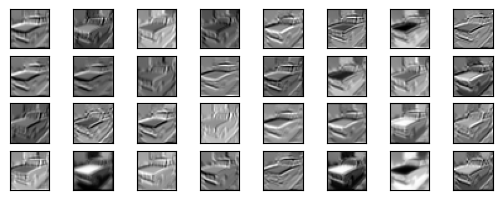

In [30]:
square = 8
ix = 1
for _ in range(square):
    for _ in range(4):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(activation['conv1'][0,ix-1,:,:].cpu().numpy(), cmap='gray')
        ix += 1
# show the figure
plt.show()

# III. Transfer Learning / Fine tuning


Suppose you have a slightly different classification task at hand: to correctly separate trucks from airplanes. 

We'll examine how we can use an already trained model to do this, instead of coding up a new neural network from scratch. 

You are required to implement two approaches -- the first simply updates the weights for the model you have trained in Question 9, while the second involves loading a larger pre-trained model (e.g. ResNet)

<span style="color:red">Warning!</span> Note that the second approach could be slow / time-consuming. If you are attempting it, please ensure that you budget ~20 mins to 1hour (worst case) for the code to complete running for this part. 

### Question 11: 

Create a subset of the CIFAR 10 data, keeping only the airplane and truck classes. 


In [ ]:
label_map = {0: 0, 9: 1}
class_names = ['airplane', 'truck']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in list(label_map.keys())]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in list(label_map.keys())]

### Question 12: 

First, use your model from Question 9 above -- and update the weights. To be precise:
- Save the model weights from Question 9.
- Then, create a new instance of the model from Question 9.
- Load the saved weights into the new model (Hint: the load_state_dict function is your friend here)
- Train this model for 10 epochs. Report the train and validation set performance. 
 

In [32]:
torch.save(new_model.state_dict(), 'new_model_weights.pth')

# Create a new instance of the model
new_model1 = NewNet(num_channels = 32)  # Replace with your model class and its arguments

# Load the saved state dictionary into the new model
new_model1.load_state_dict(torch.load('new_model_weights.pth'))

/tmp/ipykernel_1174972/2627283735.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model1.load_state_dict(torch.load('new_model_weights.pth'))


<All keys matched successfully>

In [33]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=32, shuffle = True)

learning_rate = 0.0001
optimizer = optim.SGD(new_model1.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

training( 
    model = new_model1,
    n_epochs = 10,
    optimizer = optimizer,
    
    fn_loss = loss_fn,
    data_loader = train_loader,
)

Epoch 10. Train loss 0.8122074857782632


In [35]:
validate(new_model1, train_loader)

Accuracy: 0.79
Precision: 0.70
Recall: 0.99
F1 Score: 0.82


### Question 13: Transfer Learning / Fine tuning [Extra Credit]

Second, we'll load a pre-trained model (e.g. ResNet50, or VGG19). While these models haven't seen the exact images in this dataset, they have been trained on a large general corpus. Since these models have millions of weights, so we'll implement the following approach:
- Load the pretrained model (pick any from several [available models](https://pytorch.org/vision/stable/models.html))
- Freeze the weights for all the layers (in pytorch, you can do this using model_object.parameters())
- Replace the final fully connected layer, since you have a binary classification task. You can add additional fully connected layers if you wish, alongwith related activation functions etc.
- Finally, train this new model for 10 epochs.
- Report the performance on the train and validation sets. 
    

In [55]:
import torch
import torch.nn as nn
from torchvision import models

# Load pretrained ResNet50
resnet = models.resnet50(weights='DEFAULT')

# Freeze all layers
for param in resnet.parameters():
    param.requires_grad = False

# Replace final fully connected layer for binary classification (2 classes)
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 2)  # Output logits for 2 classes (no sigmoid or softmax here)
)



# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.fc.parameters(), lr=1e-4)


In [57]:
from datetime import datetime


2025-03-28 11:50:06.379200


In [58]:
print(datetime.now())

training( 
    model = resnet,
    n_epochs = 10,
    optimizer = optimizer,
    
    fn_loss = loss_fn,
    data_loader = train_loader,
)

print(datetime.now())

2025-03-28 11:50:11.593137
Epoch 10. Train loss 0.41165840316313906
2025-03-28 11:52:19.234015


In [59]:
validate(resnet, train_loader)

Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82


### Question 14 [Extra Credit]

Compare model performance from Questions 12 and 13, and briefly summarize your observations. 